###1. 모듈 임포트

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt install fonts-nanum

!sudo apt install font-manager
!rm -rf ~/.cache/matplotlib
!pip install koreanize-matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'
import folium
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from datetime import datetime
import matplotlib.dates as md
from matplotlib import rc
import koreanize_matplotlib
from datetime import datetime
import matplotlib.dates as md
from pyproj import Transformer
import geopandas as gpd
import os
from folium import plugins
import matplotlib.ticker as ticker
import requests
import json
import csv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,014 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120500 files and dire

###2. 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)

In [ ]:
support=pd.read_excel('/content/drive/MyDrive/CJ올리브_5조/03. 프로젝트 데이터/데이터9.xlsx')

In [ ]:
score=pd.read_csv('/content/drive/MyDrive/CJ올리브_5조/04. 데이터 분석/평가지표 계산/평가지표_이상치유지_minmax_scaling_점수화.csv')

###3. 데이터 merge(최종 점수)

In [ ]:
score.head(1)

,인증번호,신청 기업명,사회적 가치 추구 여부,취약계층 소득증가액,공공 복지예산 절감비용,취약계층 고용 비율,사회적 환원 금액,참여적 의사결정 비율,유급근로자 평균임금,고용 성장률,매출액 성장률,영업성과,노동 생산성,사회적 성과,경제적 성과,최종 점수
0,2007027,북서울 장애인보호작업시설,0.0,0.281851,0.025758,0.68,0.0,0.0,0.250518,0.111755,0.036989,0.210343,0.004276,6.942193,2.560531,9.502724


In [ ]:
score=score.loc[:, ['인증번호', '사회적 성과', '경제적 성과']]

In [ ]:
# support 938
# score 897

support = pd.merge(support, score, on='인증번호', how='right')

In [ ]:
support_s=support
support_s=support_s.drop(columns=['경제적 성과'])

In [ ]:
support_f=support
support_f=support_f.drop(columns=['사회적 성과'])

###3. 컬럼 삭제(사회적 성과)

In [ ]:
support_s.columns

Index(['인증번호', '인증년도', '신청 기업명', '광역시도명', '시군구명', '설립연도', '이사회_임원등',
       '이사회_근로자대표', '이사회_수혜자', '이사회_지역사회', '이사회_연간개최회수', '지분율1', '공동대표여부',
       '지분보유인원', '지분보유기업', '취약계층근로자(총인원)', '취약계층평균임금', '취약계층평균근로시간',
       '비취약계층근로자총인원', '비취약계층평균임금', '비취약계층평균근로시간', '유급근로자총인원_2021', '유급근로자평균임금',
       '유급근로자평균근로시간', '취약계층_제공인원', '비취약계층_제공인원', '사회서비스_총인원수', '일자리창출_금액',
       '사회서비스제공_금액', '근로자처우개선_금액', '지역사회재투자_금액', '미처분이익잉여금', '매출액_2020',
       '매출액_2021', '영업이익_2020', '영업이익_2021', '당기순이익_2020', '당기순이익_2021',
       '정부지원_2020', '정부지원_2021', '기업후원_2020', '기업후원_2021', '일반지원_2020',
       '일반지원_2021', '주업종_건설업(F)', '주업종_광업(B)', '주업종_교육 서비스업(P)',
       '주업종_금융 및 보험업(K)', '주업종_기타', '주업종_농업, 임업 및 어업(A)', '주업종_도매 및 소매업(G)',
       '주업종_보건업 및 사회복지 서비스업(Q)', '주업종_부동산업 및 임대업(L)',
       '주업종_사업시설관리 및 사업지원 서비스업(N)', '주업종_숙박 및 음식점업(I)',
       '주업종_예술, 스포츠 및 여가관련 서비스업(R) ', '주업종_운수업(H)', '주업종_전기, 가스, 증기 및 수도사업(D)',
       '주업종_전문, 과학 및 기술 서비스업(M)', '주업종_제조업(C)', '주업종_출판, 영상, 방송통신 및 정보서비스업(J)',
  

In [ ]:
support_s=support_s.drop(columns=['미션과비전','취약계층근로자(총인원)','유급근로자총인원_2021','유급근로자총인원_2020','일자리창출_금액','사회서비스제공_금액','근로자처우개선_금액','지역사회재투자_금액','기타_금액','이사회_임원등',
       '이사회_근로자대표', '이사회_수혜자', '이사회_지역사회','이사회_기타','유급근로자평균임금'])

In [ ]:
support_s=support_s.drop(columns=['인증년도','설립연도'])

In [ ]:
support_s=support_s.drop(columns=['신청 기업명','광역시도명', '시군구명'])

###4. 컬럼 삭제(경제적 성과)

In [ ]:
support_f.columns

Index(['인증번호', '인증년도', '신청 기업명', '광역시도명', '시군구명', '설립연도', '이사회_임원등',
       '이사회_근로자대표', '이사회_수혜자', '이사회_지역사회', '이사회_연간개최회수', '지분율1', '공동대표여부',
       '지분보유인원', '지분보유기업', '취약계층근로자(총인원)', '취약계층평균임금', '취약계층평균근로시간',
       '비취약계층근로자총인원', '비취약계층평균임금', '비취약계층평균근로시간', '유급근로자총인원_2021', '유급근로자평균임금',
       '유급근로자평균근로시간', '취약계층_제공인원', '비취약계층_제공인원', '사회서비스_총인원수', '일자리창출_금액',
       '사회서비스제공_금액', '근로자처우개선_금액', '지역사회재투자_금액', '미처분이익잉여금', '매출액_2020',
       '매출액_2021', '영업이익_2020', '영업이익_2021', '당기순이익_2020', '당기순이익_2021',
       '정부지원_2020', '정부지원_2021', '기업후원_2020', '기업후원_2021', '일반지원_2020',
       '일반지원_2021', '주업종_건설업(F)', '주업종_광업(B)', '주업종_교육 서비스업(P)',
       '주업종_금융 및 보험업(K)', '주업종_기타', '주업종_농업, 임업 및 어업(A)', '주업종_도매 및 소매업(G)',
       '주업종_보건업 및 사회복지 서비스업(Q)', '주업종_부동산업 및 임대업(L)',
       '주업종_사업시설관리 및 사업지원 서비스업(N)', '주업종_숙박 및 음식점업(I)',
       '주업종_예술, 스포츠 및 여가관련 서비스업(R) ', '주업종_운수업(H)', '주업종_전기, 가스, 증기 및 수도사업(D)',
       '주업종_전문, 과학 및 기술 서비스업(M)', '주업종_제조업(C)', '주업종_출판, 영상, 방송통신 및 정보서비스업(J)',
  

In [ ]:
support_f=support_f.drop(columns=['미션과비전', '인증년도','설립연도', '신청 기업명','광역시도명', '시군구명', '유급근로자총인원_2021', '유급근로자총인원_2020','매출액_2020',
       '매출액_2021', '영업이익_2021'])

###4. 정규화(사회적 성과)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

selected_cols = ['이사회_연간개최회수', '지분율1', '공동대표여부', '지분보유인원', '지분보유기업', '취약계층평균임금',
       '취약계층평균근로시간', '비취약계층근로자총인원', '비취약계층평균임금', '비취약계층평균근로시간', '유급근로자평균근로시간',
       '취약계층_제공인원', '비취약계층_제공인원', '사회서비스_총인원수', '미처분이익잉여금', '매출액_2020',
       '매출액_2021', '영업이익_2020', '영업이익_2021', '당기순이익_2020', '당기순이익_2021',
       '정부지원_2020', '정부지원_2021', '기업후원_2020', '기업후원_2021', '일반지원_2020',
       '일반지원_2021', '사회적 가치 추구 여부', '근로자처우개선_수혜자수', '기타_지역사회', '지역사회재투자_수혜자수',
       '사회서비스제공_수혜자수']

# 선택한 열들의 데이터 정규화
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(support_s[selected_cols])

In [ ]:
# 정규화한 데이터로 데이터프레임 생성
normalized_df = pd.DataFrame(normalized_data, columns=selected_cols)

In [ ]:
columns_to_drop = ['이사회_연간개최회수', '지분율1', '공동대표여부', '지분보유인원', '지분보유기업', '취약계층평균임금',
       '취약계층평균근로시간', '비취약계층근로자총인원', '비취약계층평균임금', '비취약계층평균근로시간', '유급근로자평균근로시간',
       '취약계층_제공인원', '비취약계층_제공인원', '사회서비스_총인원수', '미처분이익잉여금', '매출액_2020',
       '매출액_2021', '영업이익_2020', '영업이익_2021', '당기순이익_2020', '당기순이익_2021',
       '정부지원_2020', '정부지원_2021', '기업후원_2020', '기업후원_2021', '일반지원_2020',
       '일반지원_2021', '사회적 가치 추구 여부', '근로자처우개선_수혜자수', '기타_지역사회', '지역사회재투자_수혜자수',
       '사회서비스제공_수혜자수']
support_s = support_s.drop(columns=columns_to_drop)

In [ ]:
support_s = pd.concat([normalized_df, support_s], axis=1)

###5. 정규화(경제적 성과)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

selected_cols_2 = ['이사회_임원등', '이사회_근로자대표', '이사회_수혜자', '이사회_지역사회', '이사회_연간개최회수',
       '지분율1', '공동대표여부', '지분보유인원', '지분보유기업', '취약계층근로자(총인원)', '취약계층평균임금',
       '취약계층평균근로시간', '비취약계층근로자총인원', '비취약계층평균임금', '비취약계층평균근로시간', '유급근로자평균임금',
       '유급근로자평균근로시간', '취약계층_제공인원', '비취약계층_제공인원', '사회서비스_총인원수', '일자리창출_금액',
       '사회서비스제공_금액', '근로자처우개선_금액', '지역사회재투자_금액', '미처분이익잉여금', '영업이익_2020',
       '당기순이익_2020', '당기순이익_2021', '정부지원_2020', '정부지원_2021', '기업후원_2020',
       '기업후원_2021', '일반지원_2020', '일반지원_2021','사회적 가치 추구 여부', '근로자처우개선_수혜자수', '기타_지역사회', '지역사회재투자_수혜자수',
       '사회서비스제공_수혜자수', '이사회_기타', '기타_금액']

# 선택한 열들의 데이터 정규화
scaler = MinMaxScaler()
normalized_data_2 = scaler.fit_transform(support_f[selected_cols_2])

In [ ]:
# 정규화한 데이터로 데이터프레임 생성
normalized_df_2 = pd.DataFrame(normalized_data_2, columns=selected_cols_2)

In [ ]:
columns_to_drop_2 = ['이사회_임원등', '이사회_근로자대표', '이사회_수혜자', '이사회_지역사회', '이사회_연간개최회수',
       '지분율1', '공동대표여부', '지분보유인원', '지분보유기업', '취약계층근로자(총인원)', '취약계층평균임금',
       '취약계층평균근로시간', '비취약계층근로자총인원', '비취약계층평균임금', '비취약계층평균근로시간', '유급근로자평균임금',
       '유급근로자평균근로시간', '취약계층_제공인원', '비취약계층_제공인원', '사회서비스_총인원수', '일자리창출_금액',
       '사회서비스제공_금액', '근로자처우개선_금액', '지역사회재투자_금액', '미처분이익잉여금', '영업이익_2020',
       '당기순이익_2020', '당기순이익_2021', '정부지원_2020', '정부지원_2021', '기업후원_2020',
       '기업후원_2021', '일반지원_2020', '일반지원_2021','사회적 가치 추구 여부', '근로자처우개선_수혜자수', '기타_지역사회', '지역사회재투자_수혜자수',
       '사회서비스제공_수혜자수', '이사회_기타', '기타_금액']
support_f = support_f.drop(columns=columns_to_drop_2)

In [ ]:
support_f = pd.concat([normalized_df_2, support_f], axis=1)

###6. 모델링(사회적성과)

In [ ]:
support_s.set_index('인증번호', inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_features=support_s.drop(columns=['사회적 성과'])
y_target=support_s['사회적 성과']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                    test_size=0.2, random_state=42)

In [ ]:
pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 60.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from pygam import LinearGAM
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# 랜덤 포레스트 모델 평가
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print("Random Forest MAE:", rf_mae)

# Random Forest 모델의 R2 스코어 계산
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest R2 Score:", rf_r2)

# RMSE 계산
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
print("Random Forest RMSE:", rf_rmse)

# XGBoost 모델 생성 및 학습
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# XGBoost 모델 평가
xgb_predictions = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
print("XGBoost MAE:", xgb_mae)

# XGBoost 모델의 R2 스코어 계산
xgb_r2 = r2_score(y_test, xgb_predictions)
print("XGBoost R2 Score:", xgb_r2)

# RMSE 계산
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
print("XGBoost RMSE:", xgb_rmse)

# GAM 모델 생성 및 학습
gam_model = LinearGAM()
gam_model.fit(X_train, y_train)

# GAM 모델 평가
gam_predictions = gam_model.predict(X_test)
gam_mae = mean_absolute_error(y_test, gam_predictions)
print("GAM MAE:", gam_mae)

# GAM 모델의 R2 스코어 계산
gam_r2 = r2_score(y_test, gam_predictions)
print("GAM R2 Score:", gam_r2)

# RMSE 계산
gam_mse = mean_squared_error(y_test, gam_predictions)
gam_rmse = np.sqrt(gam_mse)
print("GAM RMSE:", gam_rmse)

# GBM 모델 생성 및 학습
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

# GBM 모델 평가
gbm_predictions = gbm_model.predict(X_test)
gbm_mae = mean_absolute_error(y_test, gbm_predictions)
print("GBM MAE:", gbm_mae)

# GBM 모델의 R2 스코어 계산
gbm_r2 = r2_score(y_test, gbm_predictions)
print("GBM R2 Score:", gbm_r2)

# RMSE 계산
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(gbm_mse)
print("GBM RMSE:", gbm_rmse)

Random Forest MAE: 1.1907035184146733
Random Forest R2 Score: 0.5337323329844379
Random Forest RMSE: 1.5218212783010392
XGBoost MAE: 1.2016209563288174
XGBoost R2 Score: 0.5169474793539064
XGBoost RMSE: 1.5489706120933346
GAM MAE: 1.0942886883458722
GAM R2 Score: 0.6071370684912214
GAM RMSE: 1.3969038950897184
GBM MAE: 1.1574543890028441
GBM R2 Score: 0.567156010382871
GBM RMSE: 1.4662623986647672


###7. 모델링(경제적 성과)

In [ ]:
support_f.set_index('인증번호', inplace=True)

In [ ]:
X_features.columns

Index(['이사회_임원등', '이사회_근로자대표', '이사회_수혜자', '이사회_지역사회', '이사회_연간개최회수', '지분율1',
       '공동대표여부', '지분보유인원', '지분보유기업', '취약계층근로자(총인원)', '취약계층평균임금', '취약계층평균근로시간',
       '비취약계층근로자총인원', '비취약계층평균임금', '비취약계층평균근로시간', '유급근로자평균임금', '유급근로자평균근로시간',
       '취약계층_제공인원', '비취약계층_제공인원', '사회서비스_총인원수', '일자리창출_금액', '사회서비스제공_금액',
       '근로자처우개선_금액', '지역사회재투자_금액', '미처분이익잉여금', '영업이익_2020', '당기순이익_2020',
       '당기순이익_2021', '정부지원_2020', '정부지원_2021', '기업후원_2020', '기업후원_2021',
       '일반지원_2020', '일반지원_2021', '사회적 가치 추구 여부', '근로자처우개선_수혜자수', '기타_지역사회',
       '지역사회재투자_수혜자수', '사회서비스제공_수혜자수', '이사회_기타', '기타_금액', '주업종_건설업(F)',
       '주업종_광업(B)', '주업종_교육 서비스업(P)', '주업종_금융 및 보험업(K)', '주업종_기타',
       '주업종_농업, 임업 및 어업(A)', '주업종_도매 및 소매업(G)', '주업종_보건업 및 사회복지 서비스업(Q)',
       '주업종_부동산업 및 임대업(L)', '주업종_사업시설관리 및 사업지원 서비스업(N)', '주업종_숙박 및 음식점업(I)',
       '주업종_예술, 스포츠 및 여가관련 서비스업(R) ', '주업종_운수업(H)', '주업종_전기, 가스, 증기 및 수도사업(D)',
       '주업종_전문, 과학 및 기술 서비스업(M)', '주업종_제조업(C)', '주업종_출판, 영상, 방송통신 및 정보서비스업(J)',
       '주업종_하수, 폐기물처

In [ ]:
from sklearn.model_selection import train_test_split

X_features=support_f.drop(columns=['경제적 성과'])
y_target=support_f['경제적 성과']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                    test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from pygam import LinearGAM
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# 랜덤 포레스트 모델 평가
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print("Random Forest MAE:", rf_mae)

# Random Forest 모델의 R2 스코어 계산
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest R2 Score:", rf_r2)

# RMSE 계산
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
print("Random Forest RMSE:", rf_rmse)

# XGBoost 모델 생성 및 학습
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# XGBoost 모델 평가
xgb_predictions = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
print("XGBoost MAE:", xgb_mae)

# XGBoost 모델의 R2 스코어 계산
xgb_r2 = r2_score(y_test, xgb_predictions)
print("XGBoost R2 Score:", xgb_r2)

# RMSE 계산
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
print("XGBoost RMSE:", xgb_rmse)

# GAM 모델 생성 및 학습
gam_model = LinearGAM()
gam_model.fit(X_train, y_train)

# GAM 모델 평가
gam_predictions = gam_model.predict(X_test)
gam_mae = mean_absolute_error(y_test, gam_predictions)
print("GAM MAE:", gam_mae)

# GAM 모델의 R2 스코어 계산
gam_r2 = r2_score(y_test, gam_predictions)
print("GAM R2 Score:", gam_r2)

# RMSE 계산
gam_mse = mean_squared_error(y_test, gam_predictions)
gam_rmse = np.sqrt(gam_mse)
print("GAM RMSE:", gam_rmse)

# GBM 모델 생성 및 학습
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

# GBM 모델 평가
gbm_predictions = gbm_model.predict(X_test)
gbm_mae = mean_absolute_error(y_test, gbm_predictions)
print("GBM MAE:", gbm_mae)

# GBM 모델의 R2 스코어 계산
gbm_r2 = r2_score(y_test, gbm_predictions)
print("GBM R2 Score:", gbm_r2)

# RMSE 계산
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(gbm_mse)
print("GBM RMSE:", gbm_rmse)

Random Forest MAE: 0.4322619243568251
Random Forest R2 Score: -0.5394260646575464
Random Forest RMSE: 0.8175870126184183
XGBoost MAE: 0.4516094861275876
XGBoost R2 Score: -0.22301171590122615
XGBoost RMSE: 0.7287354136387629
GAM MAE: 0.5100538078582703
GAM R2 Score: -0.4033418618851494
GAM RMSE: 0.7806139472280735
GBM MAE: 0.4496619860713065
GBM R2 Score: -0.5091673284948404
GBM RMSE: 0.8095119490606173


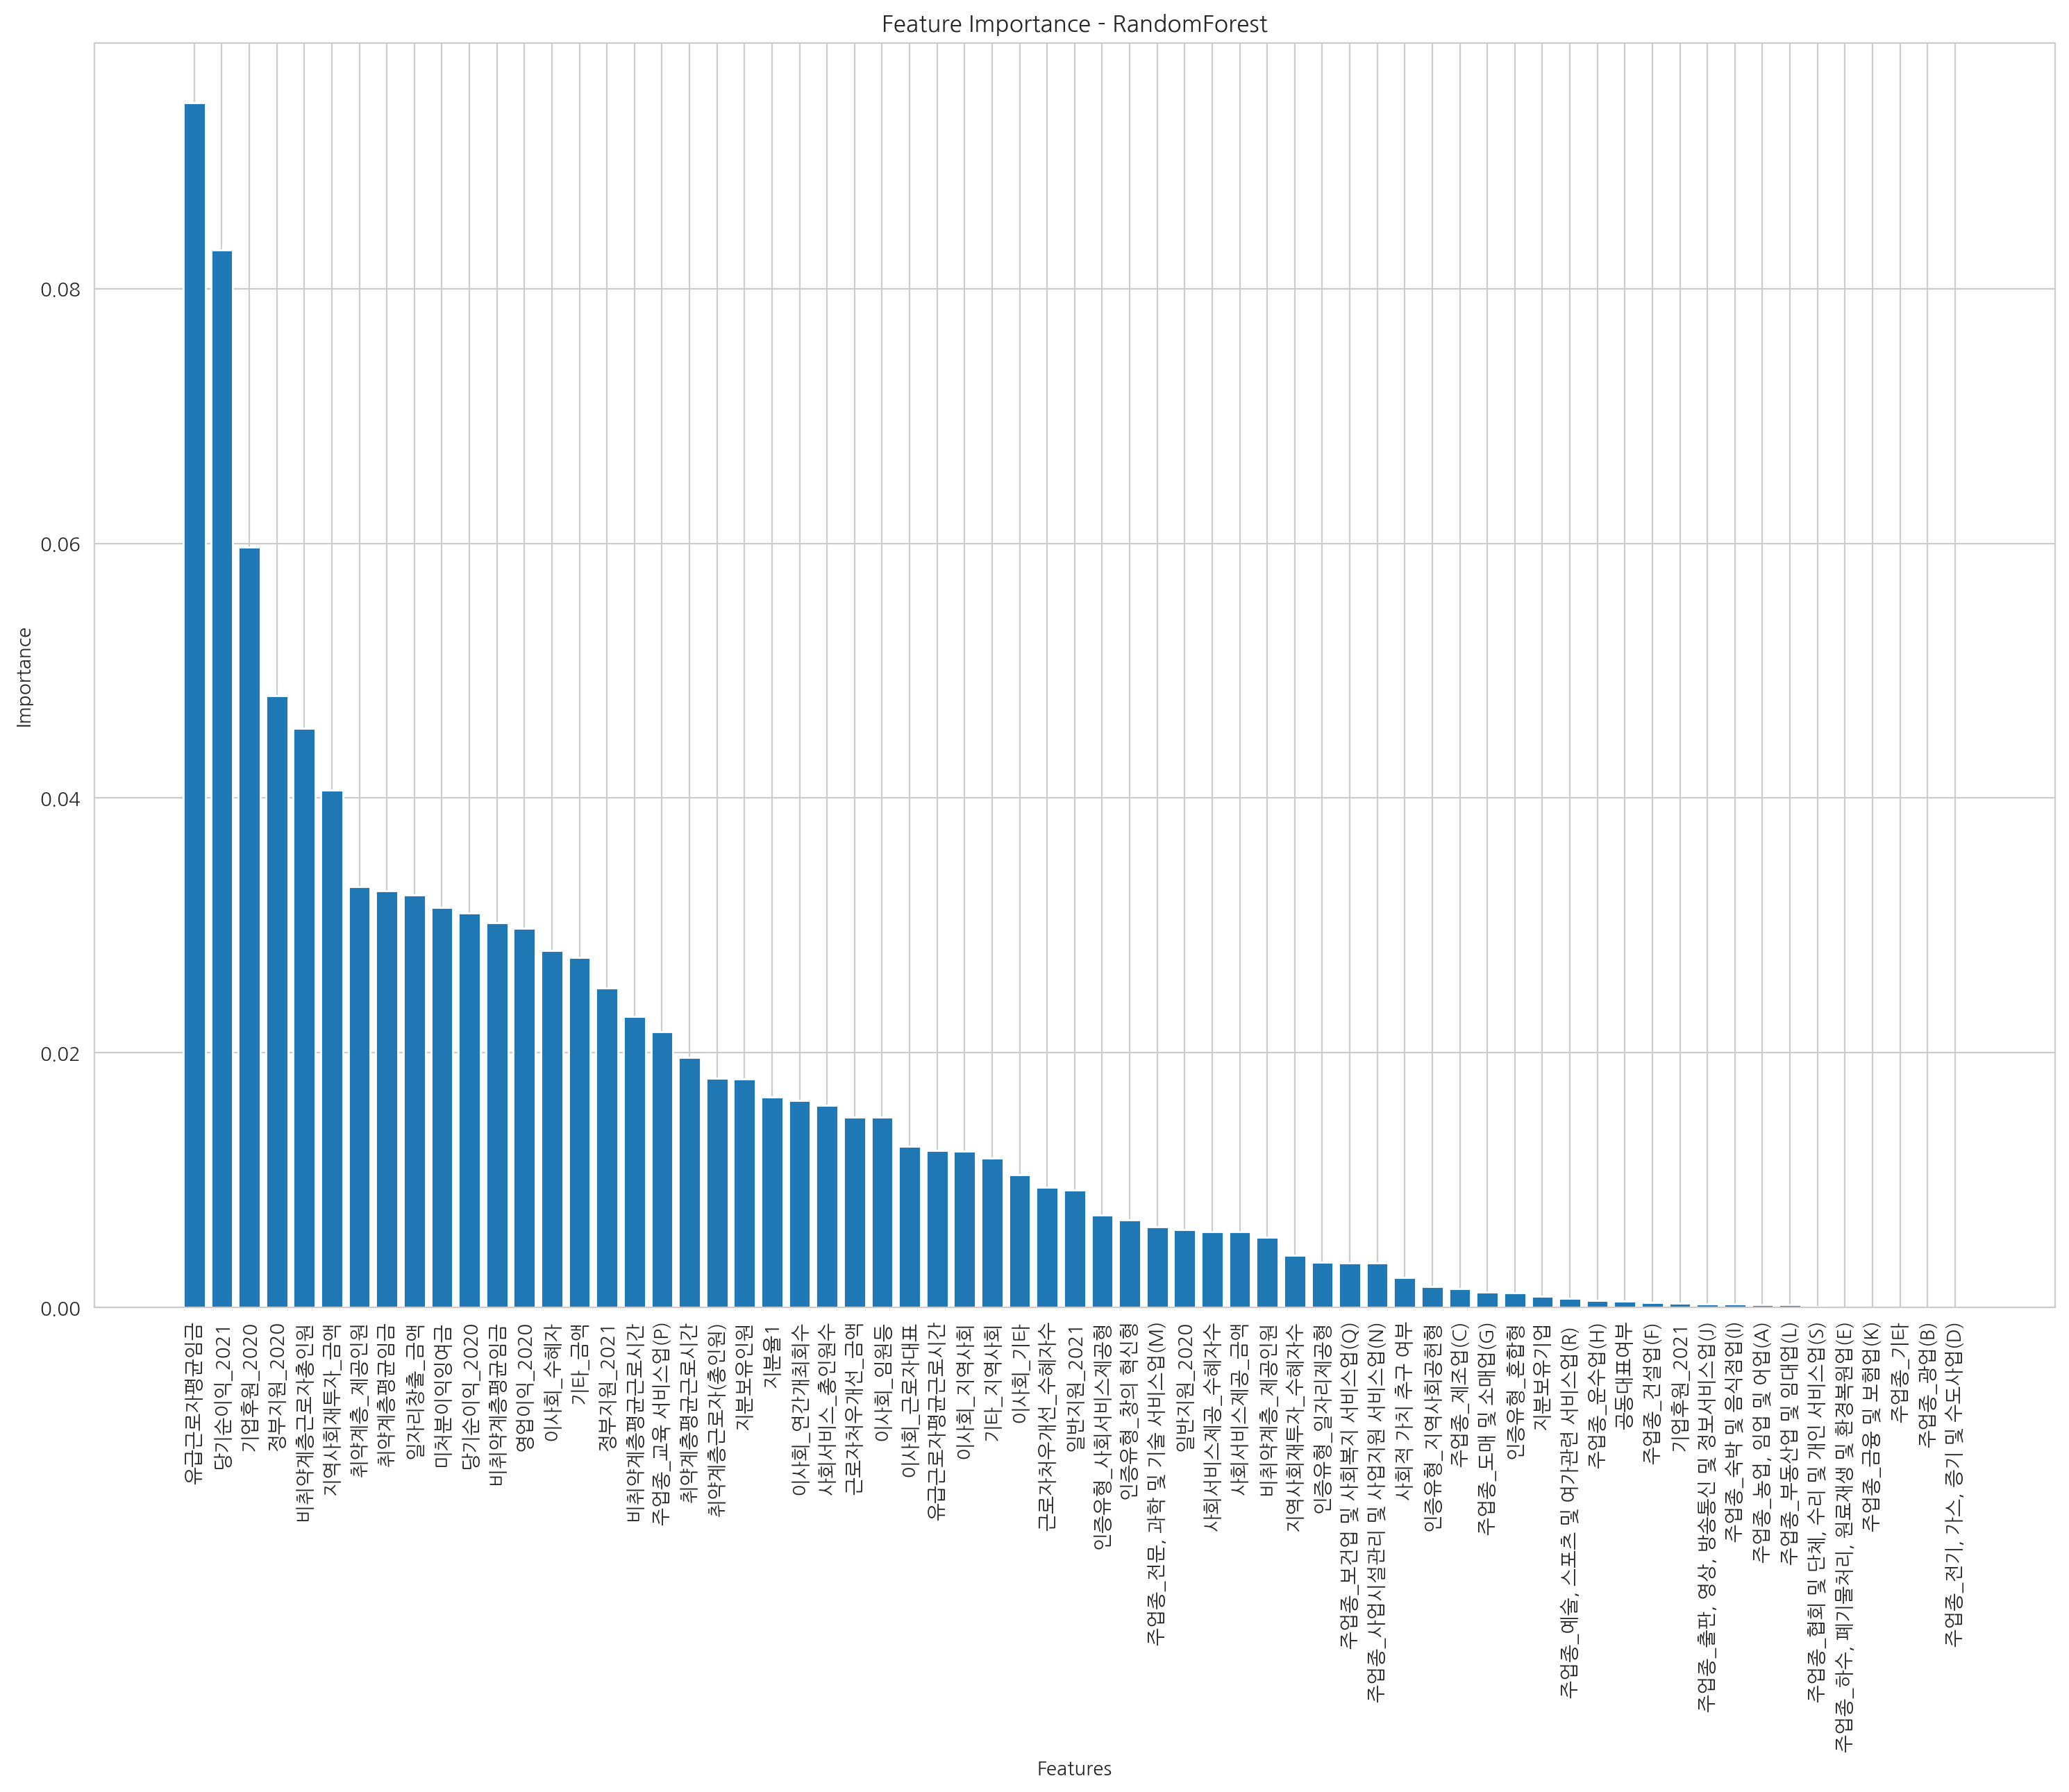

In [ ]:
# 피처가 모델 예측에 얼마나 중요한 역할을 하는지!!!!
# 피처 중요도 추출
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # 중요도를 내림차순으로 정렬한 인덱스

# 중요도에 따라 피처 이름 정렬
sorted_features = [X_train.columns[i] for i in indices]

# 중요도 순으로 정렬된 피처의 중요도 값
sorted_importances = importances[indices]

# 막대 그래프로 시각화
plt.figure(figsize=(15, 13))
plt.bar(range(len(importances)), sorted_importances)
plt.xticks(range(len(importances)), sorted_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - RandomForest')
plt.tight_layout()
plt.show()
